In [65]:
import networkx as nx
import ast
import matplotlib.pyplot as plt
from collections import defaultdict
import pickle

In [66]:
ingredient_graph = nx.read_gml("ingredients_weighted_graph.gml")

In [68]:
def visualize_ingredient_graph(G, top_n=20):
    top_ingredients = sorted(G.degree, key=lambda x: x[1], reverse=True)[:top_n]
    top_graph = G.subgraph([ing for ing, _ in top_ingredients])

    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(top_graph, k=0.5, iterations=50)

    nx.draw(
        top_graph,
        pos,
        with_labels=True,
        node_color='lightblue',
        node_size=[top_graph.degree(node) * 20 for node in top_graph.nodes()],
        font_size=8,
        edge_color='gray',
        alpha=0.7
    )

    edge_labels = nx.get_edge_attributes(top_graph, 'weight')
    nx.draw_networkx_edge_labels(top_graph, pos, edge_labels=edge_labels, font_size=7)

    plt.title("Top Ingredient Connections")
    plt.tight_layout()
    plt.show()


In [ ]:

def analyze_ingredient_popularity(df):
    ingredient_popularity = defaultdict(list)
    
    for _, row in df.iterrows():
        ingredients = row['clean_ingredients']
        rating = row['average_rating']
        
        for ing in ingredients:
            ingredient_popularity[ing].append(rating)
    
    ingredient_impact = {}
    for ing, ratings in ingredient_popularity.items():
        ingredient_impact[ing] = {
            'avg_rating': sum(ratings) / len(ratings),
            'frequency': len(ratings),
            'total_rating_impact': sum(ratings)
        }
    
    sorted_ingredients = sorted(
        ingredient_impact.items(), 
        key=lambda x: x[1]['total_rating_impact'], 
        reverse=True
    )
    
    print("\nTop Ingredients by Popularity Impact:")
    for ing, data in sorted_ingredients[:10]:
        print(f"Ingredient: {ing}")
        print(f"  Average Rating: {data['avg_rating']:.2f}")
        print(f"  Frequency in Recipes: {data['frequency']}")
        print(f"  Total Rating Impact: {data['total_rating_impact']:.2f}")
        print()


C:\Users\vassa\AppData\Local\Temp\ipykernel_21496\1263557226.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


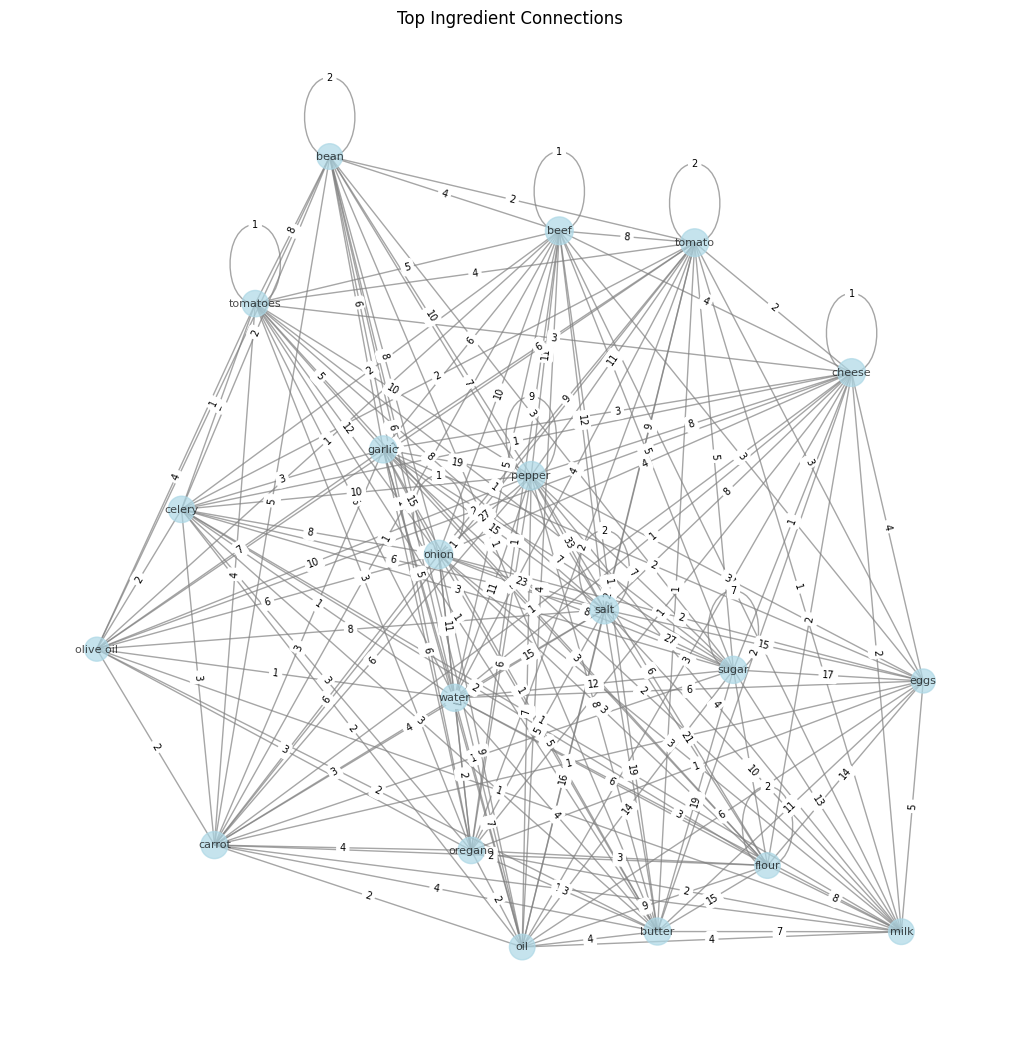

In [70]:
visualize_ingredient_graph(ingredient_graph)

Answering Specific Questions
1. Which ingredient combinations are most frequently used together, and how do they influence recipe popularity?
After loading the graph and co-occurrence data:

Use get_top_ingredient_combinations to find the most frequent ingredient pairs.
Look at the avg_rating and avg_raters in the output to analyze their influence on popularity.


2. Which ingredient has the most influence on recipe popularity?
Use analyze_ingredient_popularity to calculate the total rating impact (total_rating_impact) and sort the ingredients.

In [72]:
def get_top_ingredient_combinations_from_graph(G, top_n=10):
    top_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:top_n]
    
    print("Top Ingredient Combinations by Co-occurrence:")
    for u, v, data in top_edges:
        print(f"Ingredients: ({u}, {v})")
        print(f"  Co-occurrence Count (Weight): {data['weight']}")


In [73]:
get_top_ingredient_combinations_from_graph(ingredient_graph)

Top Ingredient Combinations by Co-occurrence:
Ingredients: (salt, pepper)
  Co-occurrence Count (Weight): 33
Ingredients: (salt, sugar)
  Co-occurrence Count (Weight): 27
Ingredients: (onion, pepper)
  Co-occurrence Count (Weight): 27
Ingredients: (salt, onion)
  Co-occurrence Count (Weight): 23
Ingredients: (sugar, flour)
  Co-occurrence Count (Weight): 23
Ingredients: (salt, flour)
  Co-occurrence Count (Weight): 21
Ingredients: (butter, salt)
  Co-occurrence Count (Weight): 19
Ingredients: (butter, sugar)
  Co-occurrence Count (Weight): 19
Ingredients: (pepper, garlic)
  Co-occurrence Count (Weight): 19
Ingredients: (eggs, sugar)
  Co-occurrence Count (Weight): 17


In [74]:
def get_top_ingredient_combinations_by_popularity(G, top_n=10):
    top_edges = sorted(
        G.edges(data=True), 
        key=lambda x: x[2].get('avg_rating', 0), 
        reverse=True
    )[:top_n]
    
    print("Top Ingredient Combinations by Recipe Popularity:")
    for u, v, data in top_edges:
        avg_rating = data.get('avg_rating', None)
        avg_raters = data.get('avg_raters', None)
        if isinstance(avg_rating, (int, float)) and isinstance(avg_raters, (int, float)):
            print(f"Ingredients: ({u}, {v})")
            print(f"  Average Recipe Rating: {avg_rating:.2f}")
            print(f"  Average Number of Raters: {avg_raters:.2f}")
        else:
            print(f"Ingredients: ({u}, {v})")
            print("  Average Recipe Rating: N/A")
            print("  Average Number of Raters: N/A")


In [75]:
get_top_ingredient_combinations_by_popularity(ingredient_graph)

Top Ingredient Combinations by Recipe Popularity:
Ingredients: (squash, seasoning)
  Average Recipe Rating: 5.00
  Average Number of Raters: 3.00
Ingredients: (squash, spice)
  Average Recipe Rating: 5.00
  Average Number of Raters: 3.00
Ingredients: (squash, honey)
  Average Recipe Rating: 5.00
  Average Number of Raters: 3.00
Ingredients: (squash, butter)
  Average Recipe Rating: 5.00
  Average Number of Raters: 3.00
Ingredients: (squash, olive oil)
  Average Recipe Rating: 5.00
  Average Number of Raters: 3.00
Ingredients: (squash, salt)
  Average Recipe Rating: 5.00
  Average Number of Raters: 3.00
Ingredients: (seasoning, spice)
  Average Recipe Rating: 5.00
  Average Number of Raters: 3.00
Ingredients: (seasoning, honey)
  Average Recipe Rating: 5.00
  Average Number of Raters: 3.00
Ingredients: (seasoning, butter)
  Average Recipe Rating: 5.00
  Average Number of Raters: 3.00
Ingredients: (seasoning, olive oil)
  Average Recipe Rating: 5.00
  Average Number of Raters: 2.50


In [76]:
def get_most_influential_ingredients(G, top_n=10):
    weighted_degree_centrality = nx.degree_centrality(G)
    
    top_nodes = sorted(weighted_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:top_n]
    
    print("Most Influential Ingredients by Weighted Degree Centrality:")
    for node, centrality in top_nodes:
        print(f"Ingredient: {node}")
        print(f"  Centrality Score: {centrality:.4f}")

In [78]:
get_most_influential_ingredients(ingredient_graph)

Most Influential Ingredients by Weighted Degree Centrality:
Ingredient: salt
  Centrality Score: 0.7089
Ingredient: onion
  Centrality Score: 0.6197
Ingredient: pepper
  Centrality Score: 0.5728
Ingredient: garlic
  Centrality Score: 0.5070
Ingredient: sugar
  Centrality Score: 0.4836
Ingredient: oil
  Centrality Score: 0.4742
Ingredient: water
  Centrality Score: 0.4601
Ingredient: butter
  Centrality Score: 0.4507
Ingredient: tomatoes
  Centrality Score: 0.3662
Ingredient: cheese
  Centrality Score: 0.3380
